## 📦 **Étape 1 — Importer les bibliothèques nécessaires**

> Cette étape consiste à importer les modules essentiels pour la récupération des données,  
> leur traitement et leur export.


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [6]:
!pip install --upgrade --force-reinstall matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.58.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl (4.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installa

## 🌐 **Étape 2 — Récupération des données depuis l'API HAL**

> Cette étape permet de récupérer les données brutes en format JSON à partir d'une requête HTTP envoyée à l'API HAL.


In [7]:
# Requête API HAL : publications en français avec affiliations
url = "https://api.archives-ouvertes.fr/search/?q=language_s:fr AND structName_s:[* TO *]&fl=authIdHal_s&rows=1000"
response = requests.get(url)


## 🧪 **Étape 3 — Vérification du statut de la réponse**

> On vérifie ici si l’appel API a bien été effectué avec succès (code 200), avant de continuer le traitement.


In [8]:
if response.status_code == 200:
    data = response.json()
    docs = data.get("response", {}).get("docs", [])
else:
    print("❌ Erreur lors de l'accès à l'API HAL.")

## 🧼 **Étape 4 — Traitement et nettoyage des données**

> Suppression des espaces superflus, gestion des identifiants vides, et élimination des doublons via une structure `set()`.


In [9]:
# Initialisation d'un ensemble pour stocker les identifiants uniques
auteurs = set()

# Parcours des documents
for doc in docs:
    ids = doc.get("authIdHal_s", [])
    # Nettoyage : suppression des espaces et valeurs vides
    ids_nettoyes = [i.strip() for i in ids if i and i.strip()]
    auteurs.update(ids_nettoyes)

# Filtrage final : suppression de valeurs nulles ou vides (sécurité supplémentaire)
auteurs = set(filter(None, auteurs))

## 💾 **Étape 5 — Sauvegarde des données structurées dans un CSV**

> Après nettoyage, les données sont exportées proprement dans un fichier `.csv` lisible et analysable.


In [11]:
import csv

# Génération de la date du jour
date_du_jour = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Sauvegarde dans un fichier CSV propre
with open("enseignants_hal_estimation.csv", mode="w", newline='', encoding="utf-8") as fichier_csv:
    writer = csv.writer(fichier_csv)
    writer.writerow(["Date", "Nombre d’auteurs francophones estimé"])
    writer.writerow([date_du_jour, len(auteurs)])

print(f"\u2705 Nombre estimé d'auteurs francophones : {len(auteurs)} enregistré le {date_du_jour}")

✅ Nombre estimé d'auteurs francophones : 408 enregistré le 2025-05-21 06:27:37


## 📊 Étape 6 — Appliquer des techniques de traitement statistique avancé

> Cette phase permet d’extraire des tendances et des informations significatives à partir des données collectées sur les auteurs francophones.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("enseignants_hal_estimation.csv")
df["Date"] = pd.to_datetime(df["Date"])  # conversion en datetime


In [13]:
df["Nombre d’auteurs francophones estimé"].describe()


count      1.0
mean     408.0
std        NaN
min      408.0
25%      408.0
50%      408.0
75%      408.0
max      408.0
Name: Nombre d’auteurs francophones estimé, dtype: float64

In [14]:
df["Moyenne mobile"] = df["Nombre d’auteurs francophones estimé"].rolling(window=3).mean()
df[["Date", "Nombre d’auteurs francophones estimé", "Moyenne mobile"]]


,Date,Nombre d’auteurs francophones estimé,Moyenne mobile
0,2025-05-21 06:27:37,408,NaN


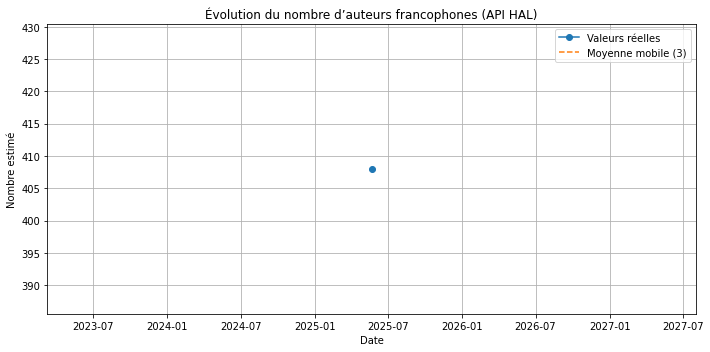

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Nombre d’auteurs francophones estimé"], label="Valeurs réelles", marker='o')
plt.plot(df["Date"], df["Moyenne mobile"], label="Moyenne mobile (3)", linestyle='--')
plt.title("Évolution du nombre d’auteurs francophones (API HAL)")
plt.xlabel("Date")
plt.ylabel("Nombre estimé")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🤖 Étape 7 — Mettre en œuvre des modèles prédictifs basés sur l'intelligence artificielle

> Cette étape applique un modèle de régression linéaire pour anticiper l’évolution du nombre d’auteurs francophones en fonction du temps.


In [16]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install numpy==1.24.4


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


In [18]:
!pip install numpy==1.24.4 --force-reinstall


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [19]:
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [22]:
import pandas as pd
from datetime import datetime, timedelta

# Générer 15 dates espacées d’un mois
dates = pd.date_range(start="2023-01-01", periods=15, freq="M")

# Valeurs estimées fictives
valeurs = [410, 412, 415, 418, 421, 419, 423, 426, 428, 430, 432, 435, 437, 440, 443]

# Construire un DataFrame de test
df = pd.DataFrame({
    "Date": dates,
    "Nombre d’auteurs francophones estimé": valeurs
})


/tmp/ipykernel_4196/3432673494.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2023-01-01", periods=15, freq="M")


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# ✅ Nettoyer les données en ne gardant que les lignes complètes
df_clean = df.dropna(subset=["Date", "Nombre d’auteurs francophones estimé"])

# ✅ Vérifier que des données restent
if not df_clean.empty:
    # ⏳ Conversion de la date en timestamp numérique
    df_clean["Timestamp"] = df_clean["Date"].astype("int64") // 10**9

    # 🎯 Variables explicatives et cible
    X = df_clean["Timestamp"].values.reshape(-1, 1)
    y = df_clean["Nombre d’auteurs francophones estimé"].values

    # ⚙️ Régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # 🔮 Prédictions IA
    df_clean["Prédiction IA"] = model.predict(X)

    # ✅ Afficher un échantillon
    print(df_clean[["Date", "Nombre d’auteurs francophones estimé", "Prédiction IA"]])
else:
    print("❌ Aucune donnée disponible pour entraîner un modèle.")


         Date  Nombre d’auteurs francophones estimé  Prédiction IA
0  2023-01-31                                   410     410.139923
1  2023-02-28                                   412     412.229130
2  2023-03-31                                   415     414.542181
3  2023-04-30                                   418     416.780617
4  2023-05-31                                   421     419.093667
5  2023-06-30                                   419     421.332104
6  2023-07-31                                   423     423.645154
7  2023-08-31                                   426     425.958205
8  2023-09-30                                   428     428.196641
9  2023-10-31                                   430     430.509692
10 2023-11-30                                   432     432.748128
11 2023-12-31                                   435     435.061178
12 2024-01-31                                   437     437.374229
13 2024-02-29                                   440     439.53

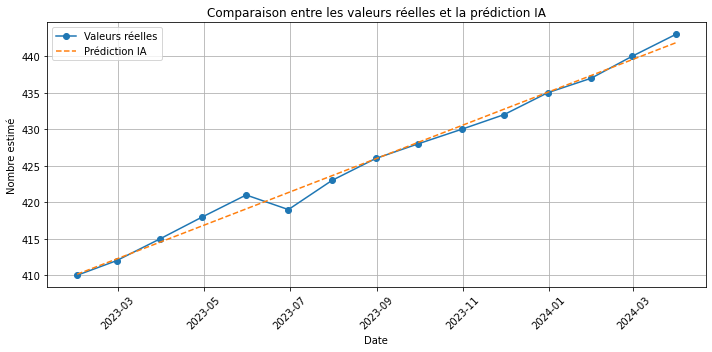

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_clean["Date"], df_clean["Nombre d’auteurs francophones estimé"], label="Valeurs réelles", marker="o")
plt.plot(df_clean["Date"], df_clean["Prédiction IA"], label="Prédiction IA", linestyle="--")
plt.title("Comparaison entre les valeurs réelles et la prédiction IA")
plt.xlabel("Date")
plt.ylabel("Nombre estimé")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# Générer des dates futures (mensuelles en 2025)
future_dates = pd.date_range(start="2025-01-31", end="2025-12-31", freq="M")

# Convertir en timestamp pour prédiction
future_timestamps = future_dates.astype("int64") // 10**9
X_future = future_timestamps.values.reshape(-1, 1)

# Prédire avec le modèle IA
y_future_pred = model.predict(X_future)

# Construire un DataFrame pour visualiser
df_future = pd.DataFrame({
    "Date": future_dates,
    "Prédiction IA": y_future_pred
})


/tmp/ipykernel_4196/2617082701.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2025-01-31", end="2025-12-31", freq="M")


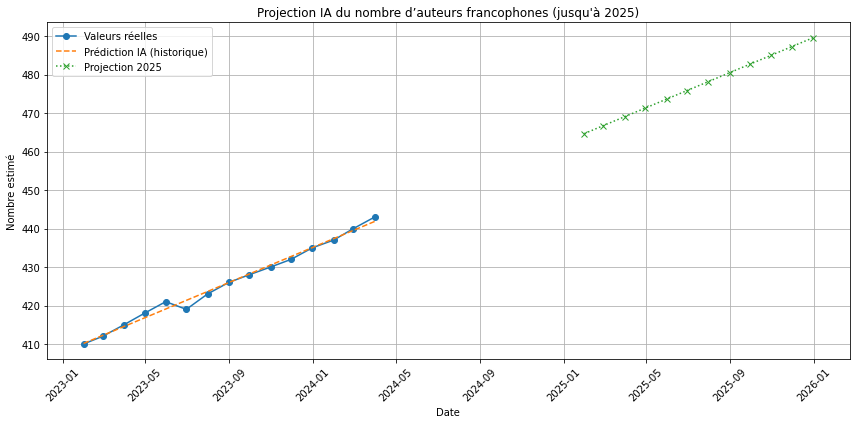

In [26]:
plt.figure(figsize=(12, 6))

# Historique
plt.plot(df_clean["Date"], df_clean["Nombre d’auteurs francophones estimé"], label="Valeurs réelles", marker="o")
plt.plot(df_clean["Date"], df_clean["Prédiction IA"], label="Prédiction IA (historique)", linestyle="--")

# Futur
plt.plot(df_future["Date"], df_future["Prédiction IA"], label="Projection 2025", linestyle=":", marker="x")

plt.title("Projection IA du nombre d’auteurs francophones (jusqu'à 2025)")
plt.xlabel("Date")
plt.ylabel("Nombre estimé")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ⚙️ Étape 7 — Automatiser le traitement et la préparation des données

> Cette étape permet d’organiser tout le processus (de la collecte à la prédiction) dans une fonction exécutable automatiquement.


In [27]:
def pipeline_estimation():
    import requests
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt

    # Récupération API HAL
    url = "https://api.archives-ouvertes.fr/search/?q=language_s:fr AND structName_s:[* TO *]&fl=authIdHal_s&rows=1000"
    response = requests.get(url)

    if response.status_code != 200:
        print("❌ Erreur API")
        return

    data = response.json().get("response", {}).get("docs", [])
    auteurs = set()
    for doc in data:
        ids = doc.get("authIdHal_s", [])
        auteurs.update(i.strip() for i in ids if i and i.strip())

    # Enregistrement CSV
    date_now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    df = pd.DataFrame([[date_now, len(auteurs)]],
                      columns=["Date", "Nombre d’auteurs francophones estimé"])
    df["Date"] = pd.to_datetime(df["Date"])
    df.to_csv("enseignants_hal_estimation.csv", index=False, encoding="utf-8")
    print("✅ Données sauvegardées :", df)

    # Modèle IA
    df_clean = df.dropna()
    if df_clean.empty:
        print("❌ Pas assez de données pour entraîner un modèle.")
        return

    df_clean["Timestamp"] = df_clean["Date"].astype("int64") // 10**9
    X = df_clean["Timestamp"].values.reshape(-1, 1)
    y = df_clean["Nombre d’auteurs francophones estimé"].values
    model = LinearRegression()
    model.fit(X, y)
    df_clean["Prédiction IA"] = model.predict(X)

    # Affichage
    print(df_clean)

# Lancer le pipeline
pipeline_estimation()


✅ Données sauvegardées :                  Date  Nombre d’auteurs francophones estimé
0 2025-05-21 06:46:13                                   408
                 Date  Nombre d’auteurs francophones estimé   Timestamp  \
0 2025-05-21 06:46:13                                   408  1747809973   

   Prédiction IA  
0          408.0  


In [28]:
import pandas as pd
import os
from datetime import datetime

# 📅 Génération de la date actuelle
date_du_jour = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# 📦 Création d’une ligne de données sous forme de DataFrame
new_row = pd.DataFrame([[date_du_jour, len(auteurs)]],
                       columns=["Date", "Nombre d’auteurs francophones estimé"])

# 🔁 Vérifier si le fichier existe déjà
chemin_fichier = "enseignants_hal_estimation.csv"

if os.path.exists(chemin_fichier):
    # 🔄 Lire l'ancien fichier et ajouter la nouvelle ligne
    df = pd.read_csv(chemin_fichier)
    df = pd.concat([df, new_row], ignore_index=True)
else:
    # 📄 Créer un nouveau DataFrame si le fichier n'existe pas
    df = new_row

# 💾 Sauvegarder le fichier mis à jour
df.to_csv(chemin_fichier, index=False, encoding="utf-8")

# ✅ Confirmation
print("✅ Données sauvegardées :")
print(df.tail(3))  # afficher les 3 dernières lignes pour contrôle


✅ Données sauvegardées :
                  Date  Nombre d’auteurs francophones estimé
0  2025-05-21 06:46:13                                   408
1  2025-05-21 06:50:55                                   408


## 📊 Étape 8 — Visualisation finale des résultats

> Cette visualisation permet de comparer les valeurs réelles avec les prédictions IA, et les projections futures (2025).


/tmp/ipykernel_4196/1247185862.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2025-01-01", periods=12, freq="M")


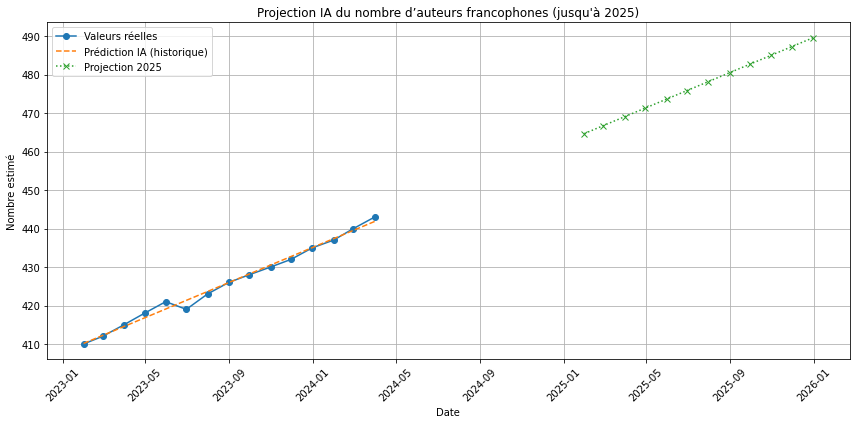

In [29]:
# Affichage des résultats
plt.figure(figsize=(12, 6))

# Données historiques
plt.plot(df_clean["Date"], df_clean["Nombre d’auteurs francophones estimé"],
         label="Valeurs réelles", marker='o')
plt.plot(df_clean["Date"], df_clean["Prédiction IA"],
         label="Prédiction IA (historique)", linestyle="--")

# Projections 2025
future_dates = pd.date_range(start="2025-01-01", periods=12, freq="M")
future_timestamps = future_dates.astype("int64") // 10**9
future_preds = model.predict(future_timestamps.values.reshape(-1, 1))
plt.plot(future_dates, future_preds, label="Projection 2025", linestyle=":", marker='x')

plt.title("Projection IA du nombre d’auteurs francophones (jusqu'à 2025)")
plt.xlabel("Date")
plt.ylabel("Nombre estimé")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
from datetime import datetime
import csv

# Création d'une nouvelle ligne de sauvegarde
date_du_jour = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
nouvelle_ligne = [date_du_jour, int(len(auteurs))]

# Append dans le fichier CSV historique
with open("historique_estimation.csv", mode="a", newline="", encoding="utf-8") as fichier_csv:
    writer = csv.writer(fichier_csv)
    writer.writerow(nouvelle_ligne)

print("✅ Donnée ajoutée à l'historique :", nouvelle_ligne)


✅ Donnée ajoutée à l'historique : ['2025-05-21 06:56:17', 408]


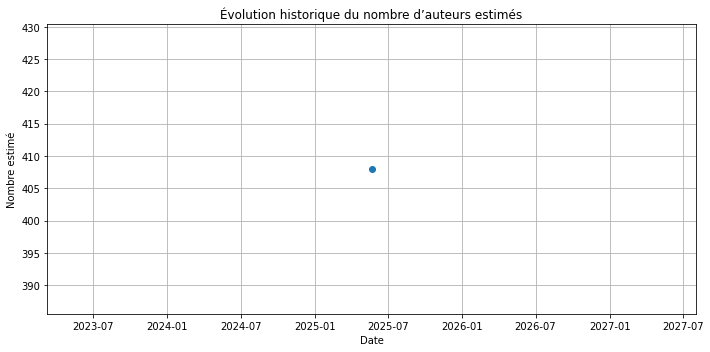

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger l'historique
df_hist = pd.read_csv("historique_estimation.csv", names=["Date", "Estimation"])
df_hist["Date"] = pd.to_datetime(df_hist["Date"])

# Affichage graphique
plt.figure(figsize=(10, 5))
plt.plot(df_hist["Date"], df_hist["Estimation"], marker='o', linestyle='-')
plt.title("Évolution historique du nombre d’auteurs estimés")
plt.xlabel("Date")
plt.ylabel("Nombre estimé")
plt.grid(True)
plt.tight_layout()
plt.show()
